In [18]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.0 MB/s eta 0:00:00-:--:--


In [2]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [openai]2m2/3 [openai]


In [3]:
import pandas as pd
from dotenv import load_dotenv
import os
import time

In [4]:
load_dotenv()

True

In [5]:
openai_api_key = os.getenv("OPENAI_KEY")

In [6]:
import openai

openai.api_key = openai_api_key

In [7]:
df = pd.read_csv("../raw_data/mbti_1_clean.csv")

In [8]:
df['text_length_words'] = df['clean_text'].str.split().apply(len)

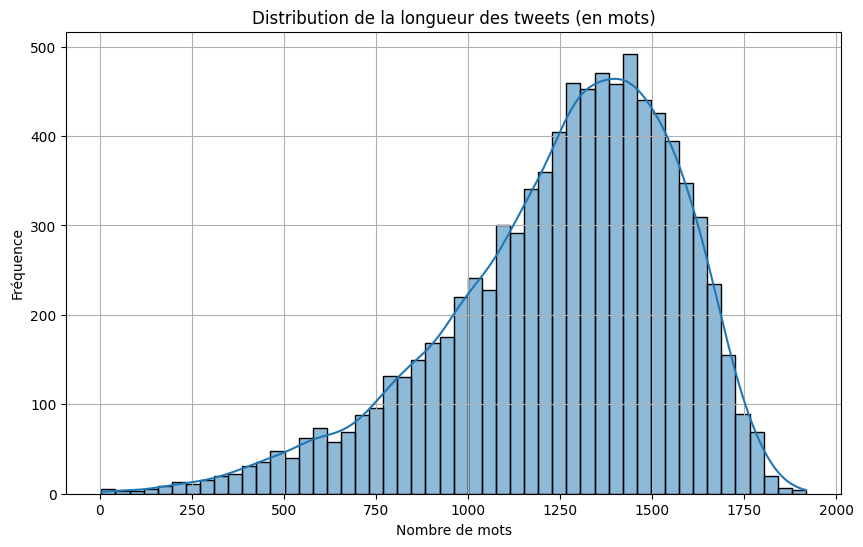

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length_words'], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets (en mots)")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [10]:
df = df[df['clean_text'].apply(lambda x: len(x.split()) < 1500 and len(x.split()) > 1000)].reset_index(drop=True)

In [ ]:
# import tiktoken

# def count_tokens(text, model="gpt-3.5-turbo"):
#     encoding = tiktoken.encoding_for_model(model)
#     return len(encoding.encode(text))

In [ ]:
# token_count = count_tokens(df['clean_text'][0])
# print(f"Token count: {token_count}")

Token count: 713


In [ ]:
# def classify_personality(text):
#     prompt = f"""
#     You are a personality classification assistant.

#     Given the following text, classify the author into one of the 16 MBTI personality types. Choose **only one** of the following:

#     INTJ (Architect) : Strategic, independent, and visionary. Loves long-term planning.
#     INTP (Logician) : Innovative, curious, and analytical. Loves exploring ideas and theories.
#     ENTJ (Commander) : Decisive, efficient, and goal-driven. Natural leader and organizer.
#     ENTP (Debater) : Energetic, witty, and inventive. Loves challenge and debate.
#     INFJ (Advocate) : Insightful, idealistic, and compassionate. Deep values and vision.
#     INFP (Mediator) : Empathetic, creative, and introspective. Seeks meaning and harmony.
#     ENFJ (Protagonist) : Charismatic, caring, and inspiring. Motivates others toward good causes.
#     ENFP (Campaigner) : Energetic, imaginative, and friendly. Seeks connection and new experiences.
#     ISTJ (Logistician) : Reliable, responsible, and practical. Follows rules and values duty.
#     ISFJ (Defender) : Loyal, nurturing, and detail-oriented. Loves to help and protect others.
#     ESTJ (Executive) : Organized, direct, and traditional. Values order and results.
#     ESFJ (Consul) : Warm, social, and supportive. Cares about harmony and others needs.
#     ISTP (Virtuoso) : Practical, hands-on, and independent. Loves to tinker and solve problems.
#     ISFP (Adventurer) : Gentle, artistic, and spontaneous. Lives in the moment.
#     ESTP (Entrepreneur) : Bold, action-oriented, and energetic. Thrives on excitement and risks.
#     ESFP (Entertainer) : Lively, expressive, and sociable. Brings fun and joy wherever they go.

#     Text:
#     \"\"\"{text}\"\"\"

#     Your answer should be **only** the MBTI type (e.g., ENFP, ISTJ, etc.).
#     """
#     response = openai.chat.completions.create(
#         model="gpt-3.5-turbo",
#         messages=[{"role": "user", "content": prompt}]
#     )
#     return response.choices[0].message.content.strip()

In [ ]:
# prediction = classify_personality(df["clean_text"][1])

In [ ]:
# prediction

'ENTP'

In [55]:
# df['predicted_personality'] = None

# for i, row in df.iterrows():
#     text = row['clean_text']
#     try:
#         prediction = classify_personality(text)
#         df.at[i, 'predicted_personality'] = prediction
#     except Exception as e:
#         print(f"Error on row {i}: {e}")
#         df.at[i, 'predicted_personality'] = "error"
#         time.sleep(5)  # avoid rate limiting

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(df['type'][0:2500], df['predicted_personality'][0:2500]))

                 precision    recall  f1-score   support

           ENFJ       0.29      0.14      0.18        59
           ENFP       0.33      0.47      0.39       189
           ENTJ       0.32      0.17      0.22        58
           ENTP       0.39      0.44      0.41       219
           ESFJ       0.00      0.00      0.00        11
           ESFP       0.00      0.00      0.00        16
           ESTJ       0.00      0.00      0.00        13
           ESTP       0.40      0.07      0.12        29
           INFJ       0.37      0.24      0.29       403
           INFP       0.49      0.53      0.51       547
           INTJ       0.44      0.10      0.16       326
           INTP       0.29      0.70      0.41       361
INTP (Logician)       0.00      0.00      0.00         0
           ISFJ       0.28      0.16      0.20        45
           ISFP       0.22      0.12      0.15        68
           ISTJ       0.30      0.06      0.10        53
           ISTP       0.68    

/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

In [ ]:
# df.to_csv('../raw_data/openAI_final.csv', index=False)

In [ ]:
system_prompt = """
You are an expert assistant in MBTI typology. Here are the meanings of the letters:

- **E** for Extraversion: energy directed outward, social interactions, action.
- **I** for Introversion: energy directed inward, reflection, solitude.
- **S** for Sensing: focus on concrete facts, details, present.
- **N** for Intuition: focus on ideas, concepts, future possibilities.
- **T** for Thinking: decisions based on logic and objectivity.
- **F** for Feeling: decisions based on personal values and harmony.
- **J** for Judging: preference for organization, planning, firm decisions.
- **P** for Perceiving: preference for flexibility, adaptability, openness to options.

Given a provided text, your task is to determine for each pair of letters (E/I, S/N, T/F, J/P):
1. The most representative letter.
2. The confidence percentage in this choice.
3. A very short explanation (max 20 words) of the choice.

Respond by correctly calling the `classify_mbti` function.
"""


In [ ]:
functions = [
    {
        "name": "classify_mbti",
        "description": "Classify MBTI letters based on user text and return confidences and brief explanations",
        "parameters": {
            "type": "object",
            "properties": {
                "EI": {
                    "type": "object",
                    "properties": {
                        "letter": {"type": "string", "enum": ["E", "I"]},
                        "confidence": {"type": "integer", "minimum": 0, "maximum": 100},
                        "explanation": {
                            "type": "string",
                            "description": "A very short explanation (max 20 words) for why this letter was chosen"
                        }
                    },
                    "required": ["letter", "confidence", "explanation"]
                },
                "SN": {
                    "type": "object",
                    "properties": {
                        "letter": {"type": "string", "enum": ["S", "N"]},
                        "confidence": {"type": "integer", "minimum": 0, "maximum": 100},
                        "explanation": {
                            "type": "string",
                            "description": "A very short explanation (max 20 words) for why this letter was chosen"
                        }
                    },
                    "required": ["letter", "confidence", "explanation"]
                },
                "TF": {
                    "type": "object",
                    "properties": {
                        "letter": {"type": "string", "enum": ["T", "F"]},
                        "confidence": {"type": "integer", "minimum": 0, "maximum": 100},
                        "explanation": {
                            "type": "string",
                            "description": "A very short explanation (max 20 words) for why this letter was chosen"
                        }
                    },
                    "required": ["letter", "confidence", "explanation"]
                },
                "JP": {
                    "type": "object",
                    "properties": {
                        "letter": {"type": "string", "enum": ["J", "P"]},
                        "confidence": {"type": "integer", "minimum": 0, "maximum": 100},
                        "explanation": {
                            "type": "string",
                            "description": "A very short explanation (max 20 words) for why this letter was chosen"
                        }
                    },
                    "required": ["letter", "confidence", "explanation"]
                },
            },
            "required": ["EI", "SN", "TF", "JP"],
        }
    }
]

In [14]:
import json

In [15]:
def classify_personality(text):
    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": text}
            ],
            functions=functions,
            function_call={"name": "classify_mbti"}
        )

        # Parse function response
        function_response = response.choices[0].message.function_call.arguments
        result = json.loads(function_response)

        return result

    except Exception as e:
        print(f"Error: {e}")
        return None

In [60]:
df

,type,clean_text,EI,SN,TF,JP,text_length_words
0,ENTP,'i'm finding the lack of me in these posts ver...,1,0,1,0,1191
1,INTJ,"'dear , i enjoyed our conversation the other d...",0,0,1,1,1105
2,INFJ,"'no, i can't draw on my own nails haha. those ...",0,0,0,1,1357
3,INTJ,'i tend to build up a collection of things on ...,0,0,1,1,1264
4,INTP,'. i'm in this position where i have to actual...,0,0,1,0,1270
...,...,...,...,...,...,...,...
4947,ENTP,'i think generally people experience post trau...,1,0,1,0,1470
4948,INTJ,'here's a planned stress relieving activity th...,0,0,1,1,1157
4949,INFJ,'i'm not sure about a method for picking out m...,0,0,0,1,1199
4950,ENFP,'so...if this thread already exists someplace ...,1,0,0,0,1344


In [61]:
classify_personality(df['clean_text'][0])

{'EI': {'letter': 'E',
  'confidence': 80,
  'explanation': 'Focus on external activities, interactions, and social engagement.'},
 'SN': {'letter': 'N',
  'confidence': 70,
  'explanation': 'Prefers ideas and possibilities over concrete details and present facts.'},
 'TF': {'letter': 'T',
  'confidence': 90,
  'explanation': 'Makes decisions based on logic and objectivity rather than personal values.'},
 'JP': {'letter': 'P',
  'confidence': 60,
  'explanation': 'Prefers flexibility and openness to new options over strict planning and organization.'}}

In [62]:
df.shape

(4952, 7)

In [63]:
df[0:100]

,type,clean_text,EI,SN,TF,JP,text_length_words
0,ENTP,'i'm finding the lack of me in these posts ver...,1,0,1,0,1191
1,INTJ,"'dear , i enjoyed our conversation the other d...",0,0,1,1,1105
2,INFJ,"'no, i can't draw on my own nails haha. those ...",0,0,0,1,1357
3,INTJ,'i tend to build up a collection of things on ...,0,0,1,1,1264
4,INTP,'. i'm in this position where i have to actual...,0,0,1,0,1270
...,...,...,...,...,...,...,...
95,INTJ,"'hi, are you really manic?. greetings.. yes, s...",0,0,1,1,1012
96,ENFP,"'sadly, no. not at all.. books and lego!. do i...",1,0,0,0,1262
97,INTP,and you never know when someone might off hand...,0,0,1,0,1122
98,INTP,"'use that logic of yours. yes, people are diff...",0,0,1,0,1406


In [ ]:
# 1. Crée les colonnes vides
df["EI_letter"] = None
df["EI_conf"] = None
df["EI_expl"] = None

df["SN_letter"] = None
df["SN_conf"] = None
df["SN_expl"] = None

df["TF_letter"] = None
df["TF_conf"] = None
df["TF_expl"] = None

df["JP_letter"] = None
df["JP_conf"] = None
df["JP_expl"] = None

# 2. Boucle sur chaque ligne
for i, row in df[0:100].iterrows():
    text = row["clean_text"]

    try:
        result = classify_personality(text)

        # 3. Stocke chaque valeur dans les bonnes colonnes
        df.at[i, "EI_letter"] = result["EI"]["letter"]
        df.at[i, "EI_conf"] = result["EI"]["confidence"]
        df.at[i, "EI_expl"] = result["EI"]["explanation"]

        df.at[i, "SN_letter"] = result["SN"]["letter"]
        df.at[i, "SN_conf"] = result["SN"]["confidence"]
        df.at[i, "SN_expl"] = result["SN"]["explanation"]

        df.at[i, "TF_letter"] = result["TF"]["letter"]
        df.at[i, "TF_conf"] = result["TF"]["confidence"]
        df.at[i, "TF_expl"] = result["TF"]["explanation"]

        df.at[i, "JP_letter"] = result["JP"]["letter"]
        df.at[i, "JP_conf"] = result["JP"]["confidence"]
        df.at[i, "JP_expl"] = result["JP"]["explanation"]

    except Exception as e:
        print(f"Error at row {i}: {e}")
        # facultatif : marquer les erreurs
        df.at[i, "EI_letter"] = "error"
        df.at[i, "SN_letter"] = "error"
        df.at[i, "TF_letter"] = "error"
        df.at[i, "JP_letter"] = "error"

        # Petit délai pour éviter un éventuel blocage API
        import time
        time.sleep(5)


df["MBTI"] = df["EI_letter"] + df["SN_letter"] + df["TF_letter"] + df["JP_letter"]

In [69]:
df.head()

,type,clean_text,EI,SN,TF,JP,text_length_words,EI_letter,EI_conf,EI_expl,SN_letter,SN_conf,SN_expl,TF_letter,TF_conf,TF_expl,JP_letter,JP_conf,JP_expl,MBTI
0,ENTP,'i'm finding the lack of me in these posts ver...,1,0,1,0,1191,I,90,"Focus on inner thoughts, introspective nature,...",N,80,Prefers ideas and possibilities over concrete ...,T,70,Decisions based on logic and analysis rather t...,P,60,"Prefers flexibility and adaptability, open to ...",INTP
1,INTJ,"'dear , i enjoyed our conversation the other d...",0,0,1,1,1105,I,70,Balanced between introversion and extraversion...,N,80,"Prefers ideas, concepts, and possibilities ove...",F,60,Decisions based on values and personal harmony...,P,90,"Prefers flexibility, adaptability, and opennes...",INFP
2,INFJ,"'no, i can't draw on my own nails haha. those ...",0,0,0,1,1357,I,80,"Reflects on personal experiences, mentions sol...",N,70,"Focuses on ideas, concepts, and supernatural e...",F,60,"Values emotional connections, cares about the ...",P,90,"Prefers flexibility, open to various interpret...",INFP
3,INTJ,'i tend to build up a collection of things on ...,0,0,1,1,1264,I,90,"Prefers solitude, deep reflection, and limited...",N,80,"Focuses on abstract ideas, possibilities, and ...",F,70,"Values personal feelings, empathy, and harmony...",P,60,"Prefers adaptability, open options, and lacks ...",INFP
4,INTP,'. i'm in this position where i have to actual...,0,0,1,0,1270,I,70,Introversion due to focus on personal feelings...,N,80,"Intuition as attention is on ideas, possibilit...",F,60,Feeling evident in decisions based on personal...,P,90,"Perception indicated by flexibility, indecisio...",INFP


In [67]:
from sklearn.metrics import classification_report

print(classification_report(df['type'][0:100], df['MBTI'][0:100]))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00         3
        ENFP       0.33      0.10      0.15        10
        ENTJ       0.00      0.00      0.00         4
        ENTP       0.00      0.00      0.00         5
        ESFJ       0.00      0.00      0.00         0
        ESFP       0.00      0.00      0.00         0
        ESTP       0.00      0.00      0.00         1
        INFJ       1.00      0.04      0.08        23
        INFP       0.24      0.82      0.37        17
        INTJ       0.00      0.00      0.00        12
        INTP       0.29      0.40      0.33        15
        ISFJ       0.00      0.00      0.00         1
        ISFP       0.00      0.00      0.00         3
        ISTJ       0.00      0.00      0.00         1
        ISTP       0.00      0.00      0.00         5

    accuracy                           0.22       100
   macro avg       0.12      0.09      0.06       100
weighted avg       0.35   

/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tanguy/.pyenv/versions/vibe/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

In [70]:
df['EI'] = ['E' if x == 1 else 'I' for x in df['EI']]
df['SN'] = ['S' if x == 1 else 'N' for x in df['SN']]
df['TF'] = ['T' if x == 1 else 'F' for x in df['TF']]
df['JP'] = ['J' if x == 1 else 'P' for x in df['JP']]

In [71]:
df.head()

,type,clean_text,EI,SN,TF,JP,text_length_words,EI_letter,EI_conf,EI_expl,SN_letter,SN_conf,SN_expl,TF_letter,TF_conf,TF_expl,JP_letter,JP_conf,JP_expl,MBTI
0,ENTP,'i'm finding the lack of me in these posts ver...,E,N,T,P,1191,I,90,"Focus on inner thoughts, introspective nature,...",N,80,Prefers ideas and possibilities over concrete ...,T,70,Decisions based on logic and analysis rather t...,P,60,"Prefers flexibility and adaptability, open to ...",INTP
1,INTJ,"'dear , i enjoyed our conversation the other d...",I,N,T,J,1105,I,70,Balanced between introversion and extraversion...,N,80,"Prefers ideas, concepts, and possibilities ove...",F,60,Decisions based on values and personal harmony...,P,90,"Prefers flexibility, adaptability, and opennes...",INFP
2,INFJ,"'no, i can't draw on my own nails haha. those ...",I,N,F,J,1357,I,80,"Reflects on personal experiences, mentions sol...",N,70,"Focuses on ideas, concepts, and supernatural e...",F,60,"Values emotional connections, cares about the ...",P,90,"Prefers flexibility, open to various interpret...",INFP
3,INTJ,'i tend to build up a collection of things on ...,I,N,T,J,1264,I,90,"Prefers solitude, deep reflection, and limited...",N,80,"Focuses on abstract ideas, possibilities, and ...",F,70,"Values personal feelings, empathy, and harmony...",P,60,"Prefers adaptability, open options, and lacks ...",INFP
4,INTP,'. i'm in this position where i have to actual...,I,N,T,P,1270,I,70,Introversion due to focus on personal feelings...,N,80,"Intuition as attention is on ideas, possibilit...",F,60,Feeling evident in decisions based on personal...,P,90,"Perception indicated by flexibility, indecisio...",INFP


In [74]:
print(classification_report(df['EI'][0:100], df['EI_letter'][0:100]))

              precision    recall  f1-score   support

           E       0.17      0.04      0.07        23
           I       0.77      0.94      0.84        77

    accuracy                           0.73       100
   macro avg       0.47      0.49      0.46       100
weighted avg       0.63      0.73      0.66       100



In [75]:
print(classification_report(df['SN'][0:100], df['SN_letter'][0:100]))

              precision    recall  f1-score   support

           N       0.92      0.89      0.90        89
           S       0.29      0.36      0.32        11

    accuracy                           0.83       100
   macro avg       0.60      0.63      0.61       100
weighted avg       0.85      0.83      0.84       100



In [76]:
print(classification_report(df['JP'][0:100], df['JP_letter'][0:100]))

              precision    recall  f1-score   support

           J       0.75      0.07      0.12        44
           P       0.57      0.98      0.72        56

    accuracy                           0.58       100
   macro avg       0.66      0.53      0.42       100
weighted avg       0.65      0.58      0.46       100



In [77]:
print(classification_report(df['TF'][0:100], df['TF_letter'][0:100]))

              precision    recall  f1-score   support

           F       0.75      0.98      0.85        57
           T       0.96      0.56      0.71        43

    accuracy                           0.80       100
   macro avg       0.85      0.77      0.78       100
weighted avg       0.84      0.80      0.79       100



In [78]:
df.to_csv('../raw_data/openAI_final.csv', index=False)

In [80]:
df.head(1)

,type,clean_text,EI,SN,TF,JP,text_length_words,EI_letter,EI_conf,EI_expl,SN_letter,SN_conf,SN_expl,TF_letter,TF_conf,TF_expl,JP_letter,JP_conf,JP_expl,MBTI
0,ENTP,'i'm finding the lack of me in these posts ver...,E,N,T,P,1191,I,90,"Focus on inner thoughts, introspective nature,...",N,80,Prefers ideas and possibilities over concrete ...,T,70,Decisions based on logic and analysis rather t...,P,60,"Prefers flexibility and adaptability, open to ...",INTP


In [83]:
accuracy = (df[0:100]['type'] == df[0:100]['MBTI']).mean() * 100

print(f"Pourcentage de MBTI correctement prédits : {accuracy:.2f}%")

Pourcentage de MBTI correctement prédits : 22.00%


In [84]:
accuracy_ie = (df[0:100]['EI'] == df[0:100]['EI_letter']).mean() * 100
accuracy_ns = (df[0:100]['SN'] == df[0:100]['SN_letter']).mean() * 100
accuracy_tf = (df[0:100]['TF'] == df[0:100]['TF_letter']).mean() * 100
accuracy_jp = (df[0:100]['JP'] == df[0:100]['JP_letter']).mean() * 100


print(f"Pourcentage de IE correctement prédits : {accuracy_ie:.2f}%")
print(f"Pourcentage de NS correctement prédits : {accuracy_ns:.2f}%")
print(f"Pourcentage de TF correctement prédits : {accuracy_tf:.2f}%")
print(f"Pourcentage de JP correctement prédits : {accuracy_jp:.2f}%")

Pourcentage de IE correctement prédits : 73.00%
Pourcentage de NS correctement prédits : 83.00%
Pourcentage de TF correctement prédits : 80.00%
Pourcentage de JP correctement prédits : 58.00%


In [85]:
classify_personality("The Fake News Media is at it again! They don’t want to report the facts — record jobs, booming economy, the strongest border in history. We did more in 4 years than Biden could do in 40! People are waking up — the Silent Majority is back, stronger than ever. 2024 is OURS! #MAGA #AmericaFirst 🇺🇸")

{'EI': {'letter': 'E',
  'confidence': 90,
  'explanation': 'Focus on external events and actions, energized by interaction and social engagement.'},
 'SN': {'letter': 'S',
  'confidence': 80,
  'explanation': 'Attention to concrete facts such as jobs, economy, and border security, emphasizing the present situation.'},
 'TF': {'letter': 'T',
  'confidence': 70,
  'explanation': 'Decisions based on objective facts like record jobs and economy achievements.'},
 'JP': {'letter': 'J',
  'confidence': 80,
  'explanation': 'Tendency towards a firm and planned outlook, emphasizing achievements and future plans.'}}

In [16]:
classify_personality("Music has always been my way of healing. No matter where you are in the world, I hope today you find a moment to breathe, to feel, and to let love in. 💫❤️ Thank you for being with me through every note. #Gratitude #OneHeart")

{'EI': {'letter': 'I',
  'confidence': 90,
  'explanation': 'Focus on emotions, introspective tone.'},
 'SN': {'letter': 'N',
  'confidence': 80,
  'explanation': 'Focus on feelings, abstract concepts like love and gratitude.'},
 'TF': {'letter': 'F',
  'confidence': 95,
  'explanation': 'Emphasizes emotions, love, healing through music.'},
 'JP': {'letter': 'P',
  'confidence': 70,
  'explanation': 'Openness to experiences, focusing on emotions and gratitude.'}}